<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/Electricity_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 連接kaggle api
api_token = {"username":"victor830717","key":"e5ff0036288b15a13b2e2e4444e5051b"}
import json
import zipfile
import os

# 建資料夾 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
# !kaggle datasets download -d {kaggle資料集名稱} --force
!kaggle datasets download -d utathya/electricity-consumption --force
 
!ls /kaggle

  0% 0.00/458k [00:00<?, ?B/s]
100% 458k/458k [00:00<00:00, 103MB/s]
electricity-consumption.zip


In [2]:
! unzip electricity-consumption.zip # 解壓縮檔案

Archive:  electricity-consumption.zip
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [29]:
train = pd.read_csv('../kaggle/train.csv')
test = pd.read_csv('../kaggle/test.csv')

In [30]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB
None


,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


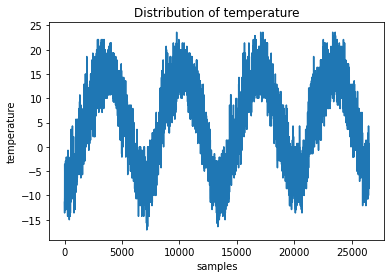

In [31]:
w = train.temperature
plt.plot(w)
plt.xlabel('samples')
plt.ylabel('temperature')
plt.title('Distribution of temperature')
plt.show()

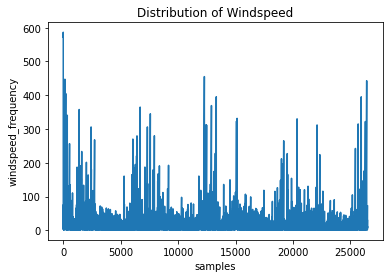

In [32]:
w = train.windspeed
plt.plot(w)
plt.xlabel('samples')
plt.ylabel('windspeed_frequency')
plt.title('Distribution of Windspeed')
plt.show()

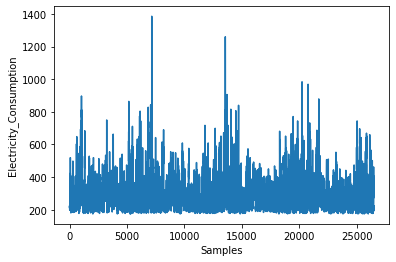

In [33]:
plt.plot(train.electricity_consumption)
plt.xlabel('Samples')
plt.ylabel('Electricity_Consumption')
plt.show()

In [34]:
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0


In [35]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['var2']=LE.fit_transform(train.var2)
train

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,0,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,0,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,0,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,0,210.0


In [36]:
test['var2']=LE.fit_transform(test.var2)
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,0
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,0
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,0
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,0
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,0


In [37]:
# 通過pandas.read_csv()或者pandas.read_excel()讀取檔案過後，得到的資料列對應的型別是“object”，這樣沒法對時間資料處理，
# 可以用過pd.to_datetime將該列資料轉換為時間型別，即datetime。
# 轉換過後就可以對這些時間資料操作了，可以相減求時間差，計算相差的秒數和天數
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           8568 non-null   int64         
 1   datetime     8568 non-null   datetime64[ns]
 2   temperature  8568 non-null   float64       
 3   var1         8568 non-null   float64       
 4   pressure     8568 non-null   float64       
 5   windspeed    8568 non-null   float64       
 6   var2         8568 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 468.7 KB


In [38]:
train['Weekday'] = [datetime.weekday(date) for date in train.datetime]
train['Year'] = [date.year for date in train.datetime]
train['Month'] = [date.month for date in train.datetime]
train['Day'] = [date.day for date in train.datetime]
train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in train.datetime]
train['Week'] = [date.week for date in train.datetime]
train['Quarter'] = [date.quarter for date in train.datetime]
test['Weekday'] = [datetime.weekday(date) for date in test.datetime]
test['Year'] = [date.year for date in test.datetime]
test['Month'] = [date.month for date in test.datetime]
test['Day'] = [date.day for date in test.datetime]
test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in test.datetime]
test['Week'] = [date.week for date in test.datetime]
test['Quarter'] = [date.quarter for date in test.datetime]
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,Weekday,Year,Month,Day,Time,Week,Quarter
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,0,2,2013,7,24,0,30,3
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,0,2,2013,7,24,3600,30,3
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,0,2,2013,7,24,7200,30,3
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,0,2,2013,7,24,10800,30,3
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,0,2,2013,7,24,14400,30,3


In [39]:
X_train = train.drop(['ID','electricity_consumption'],axis=1)
X_train.head()

,datetime,temperature,var1,pressure,windspeed,var2,Weekday,Year,Month,Day,Time,Week,Quarter
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,0,2013,7,1,0,27,3
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,0,2013,7,1,3600,27,3
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,0,2013,7,1,7200,27,3
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,0,2013,7,1,10800,27,3
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,0,2013,7,1,14400,27,3


In [40]:
# datetime轉換成秒數
def convert(data):
  unixtime = []
  lens = len(data)
  for i in range(lens):
    unixtime.append(round(time.mktime(data['datetime'][i].timetuple())))
  data['datetime'] = unixtime
  return data



X_train = convert(X_train)
X_train = X_train.drop(['datetime'],axis=1) # 驗證過增加此欄位效果並不好
X_train

,temperature,var1,pressure,windspeed,var2,Weekday,Year,Month,Day,Time,Week,Quarter
0,-11.4,-17.1,1003.0,571.910,0,0,2013,7,1,0,27,3
1,-12.1,-19.3,996.0,575.040,0,0,2013,7,1,3600,27,3
2,-12.9,-20.0,1000.0,578.435,0,0,2013,7,1,7200,27,3
3,-11.4,-17.1,995.0,582.580,0,0,2013,7,1,10800,27,3
4,-11.4,-19.3,1005.0,586.600,0,0,2013,7,1,14400,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...
26491,-0.7,-15.0,1009.0,51.685,0,4,2017,6,23,68400,25,2
26492,-2.9,-11.4,1005.0,56.105,0,4,2017,6,23,72000,25,2
26493,-1.4,-12.9,995.0,61.275,0,4,2017,6,23,75600,25,2
26494,-2.9,-11.4,996.0,67.210,0,4,2017,6,23,79200,25,2


In [41]:
y_train = train['electricity_consumption']

y_train

0        216.0
1        210.0
2        225.0
3        216.0
4        222.0
         ...  
26491    225.0
26492    213.0
26493    213.0
26494    210.0
26495    210.0
Name: electricity_consumption, Length: 26496, dtype: float64

In [42]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
y_train_s = (y_train - min(y_train))/(max(y_train) - min(y_train))
X_train_s

array([[-1.90021483, -1.45652349,  1.37883732, ..., -1.66132477,
         0.05159146,  0.4472136 ],
       [-1.98083494, -1.66756148,  0.79562161, ..., -1.51686175,
         0.05159146,  0.4472136 ],
       [-2.07297222, -1.73470993,  1.12888773, ..., -1.37239873,
         0.05159146,  0.4472136 ],
       ...,
       [-0.74849887, -1.05363279,  0.71230508, ...,  1.37239873,
        -0.08102081, -0.4472136 ],
       [-0.92125627, -0.90974326,  0.79562161, ...,  1.51686175,
        -0.08102081, -0.4472136 ],
       [-0.82911899, -0.90974326,  1.8787365 , ...,  1.66132477,
        -0.08102081, -0.4472136 ]])

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
import xgboost
model = xgboost.XGBRegressor()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10, n_jobs=-1) # 'neg_mean_absolute_error'
# force scores to be positive
scores = absolute(scores)
print(scores.mean())


0.32278719186085664


In [44]:
import pandas as pd
#RandomForestClassifier的Attributes:feature_importances_找出特徵的重要性
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)
pd.DataFrame(model.feature_importances_, 
       columns=["Importance"],
       index=X_train.columns).sort_values(by="Importance", ascending=False)
       #ascending=False降冪排列

[01:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Importance
windspeed,0.227763
temperature,0.201484
var1,0.147444
Month,0.131163
Week,0.083538
Day,0.052116
Year,0.047998
Time,0.032364
var2,0.026820
Weekday,0.025511


In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
params = {
    "max_depth":range(1, 50,2)
}

#mean_absolute
grid = GridSearchCV(regressor, params, cv=10, n_jobs=-1, scoring="r2")
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.1590260523948432
{'max_depth': 7}


In [46]:
#knn回歸
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

regressor = KNeighborsRegressor()
params = {
    "n_neighbors":range(1, 20)
}
#GridSearch函式：利用交叉驗證幫你調出最佳參數
#mean_absolute
grid = GridSearchCV(regressor, params, cv=10, n_jobs=-1, scoring="r2")
grid.fit(X_train_s, y_train_s)
print(grid.best_score_)
print(grid.best_params_)

0.07968423197254655
{'n_neighbors': 19}


In [47]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.special import inv_boxcox1p
cv = ElasticNetCV(cv=10)
cv.fit(X_train_s, y_train_s)
print(cv.alpha_)
model =ElasticNet(alpha = cv.alpha_ )



scores = cross_val_score(model, np.array(X_train_s), np.array(y_train_s), cv=10, scoring="r2") 
print(scores)
print(np.average(scores))
scores = cross_val_score(model, np.array(X_train_s), np.array(y_train_s), cv=10, scoring="neg_mean_squared_error") 
print(scores)
print(np.average(scores))

0.0016031282194299656
[ 0.21222607  0.09939817  0.26845363  0.21610264  0.25447505  0.20817211
  0.09709704  0.2019002  -0.11524138  0.28790808]
0.17304916221645522
[-0.00741531 -0.00486999 -0.00839904 -0.00379632 -0.00470568 -0.01021419
 -0.00291973 -0.0097104  -0.00442112 -0.0058649 ]
-0.006231668440301906


In [60]:
#svr回歸
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


 
# 使用线性核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
linear_svr = SVR(kernel='linear',C=1.0, epsilon=0.2)

# 使用多项式核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
poly_svr = SVR(kernel='poly',C=1.0, epsilon=0.2)

 
# 使用径向基核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
rbf_svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)


scores = cross_val_score(poly_svr, X_train_s, y_train_s, cv=10, scoring="r2") #scoring="r2","neg_mean_absolute_error"
print(scores)
print(np.average(scores))

[-0.97572043 -1.86484504 -0.14925723 -1.16597011 -1.41060023 -0.33990553
 -2.77016192  0.03276732 -2.63580457 -0.80391463]
-1.2083412368030522


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
classifier = Sequential()
callbacks = [
   EarlyStopping(patience=6, monitor = 'mae',restore_best_weights=True) 
]# monitor要根據model設定的loss or metrics設定

classifier.add(Dense(units = 9, kernel_initializer = 'uniform',input_dim =12, activation = 'relu'))
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae']) 
classifier.fit(X_train_s, y_train_s, batch_size = 16, epochs = 50,callbacks=callbacks)

Epoch 1/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0213 - mae: 0.0939
Epoch 2/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0051 - mae: 0.0511
Epoch 3/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0048 - mae: 0.0492
Epoch 4/50
1656/1656 [==============================] - 4s 2ms/step - loss: 0.0046 - mae: 0.0482
Epoch 5/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0044 - mae: 0.0472
Epoch 6/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0043 - mae: 0.0465
Epoch 7/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0042 - mae: 0.0461
Epoch 8/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0042 - mae: 0.0458
Epoch 9/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0042 - mae: 0.0456
Epoch 10/50
1656/1656 [==============================] - 3s 2ms/step - loss: 0.0041 - mae: 0.0455
Epoch 11/50
1656/1656 [======

In [57]:
y_pred = classifier.predict(X_train_s)
y_pred = (y_pred * (max(y_train) - min(y_train))) + min(y_train)

predictions = [int(i) for i in y_pred]

Solution = pd.DataFrame()
Solution['ID'] = train['ID']

# Prepare Solution dataframe
Solution['predict'] = predictions
Solution['actual'] = y_train
Solution['predict'].unique()
Solution

828/828 [==============================] - 1s 1ms/step


,ID,predict,actual
0,0,175,216.0
1,1,174,210.0
2,2,174,225.0
3,3,175,216.0
4,4,174,222.0
...,...,...,...
26491,34891,223,225.0
26492,34892,254,213.0
26493,34893,235,213.0
26494,34894,242,210.0
